In [1]:
import scanpy as sc
import anndata
from scipy import io
from scipy.io import mmread
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd


In [2]:
print("Current Directory:", os.getcwd())

Current Directory: /Users/chupan/Documents/gscProj


In [4]:
X = mmread("/Users/chupan/Documents/gscProj/seurat/stemdata/seurat_obj_counts.mtx")
X
# create anndata object
adata = anndata.AnnData(
  X=X.transpose().tocsr()
)
X


<COOrdinate sparse matrix of dtype 'int64'
	with 162371543 stored elements and shape (36601, 35999)>

In [5]:
# load cell metadata:
cell_meta = pd.read_csv("/Users/chupan/Documents/gscProj/seurat/stemdata/seurat_obj_metadata.csv")
cell_meta


,orig.ident,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,percent.mt,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,id,barcode,pc_1,pc_2
0,SeuratProject,10480,3454,11864,5561,12.652672,0.452865,0.06,4.395604,0.25,G523_L,G523_L|AAACAGCCAAGATTCT-1,-6.183928,-0.909645
1,SeuratProject,12214,3898,54872,21937,15.981660,0.659836,0.61,4.784914,0.51,G523_L,G523_L|AAACAGCCAATTAGCT-1,-15.113271,-7.556679
2,SeuratProject,4316,1948,6684,3374,14.434662,0.552632,0.27,4.659418,0.42,G523_L,G523_L|AAACAGCCAATTTAGC-1,-3.152434,-0.637268
3,SeuratProject,10280,3741,76629,26723,12.237354,0.762776,0.84,4.829240,0.54,G523_L,G523_L|AAACAGCCACCCTCAC-1,-13.139838,-7.491379
4,SeuratProject,4718,2162,19483,9003,0.127173,0.426269,0.04,5.004881,0.65,G523_L,G523_L|AAACATGCACAACAGG-1,-3.918138,-0.813935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35994,SeuratProject,9835,3718,24262,11706,11.550585,0.650134,0.37,4.251163,0.44,G837_L,G837_L|TTTGTGTTCGTCCTTA-1,12.937877,2.332675
35995,SeuratProject,10078,3948,33814,15173,8.622743,0.596242,0.23,4.205754,0.40,G837_L,G837_L|TTTGTGTTCTCACTAT-1,17.256080,3.718617
35996,SeuratProject,7679,3367,30920,14333,11.017060,0.813709,0.81,4.720711,0.74,G837_L,G837_L|TTTGTGTTCTTGTCTG-1,15.030446,3.393228
35997,SeuratProject,10923,3954,62111,26394,5.758491,0.936218,0.95,3.858002,0.17,G837_L,G837_L|TTTGTTGGTTGTTCAC-1,24.720443,6.306804


In [6]:
with open("/Users/chupan/Documents/gscProj/seurat/stemdata/seurat_obj_gene_names.csv", 'r') as f:
  gene_names = f.read().splitlines()

# set anndata observations and index obs by barcodes, var by gene names
adata.obs = cell_meta
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names
adata

AnnData object with n_obs × n_vars = 35999 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'percent.mt', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'id', 'barcode', 'pc_1', 'pc_2'

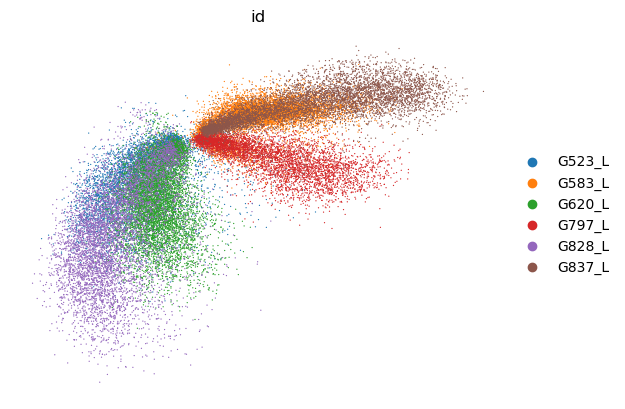

In [7]:
# set pca and umap

adata.obsm['X_pca'] = np.vstack((adata.obs['pc_1'].to_numpy(), adata.obs['pc_2'].to_numpy())).T
adata.obsm

# plot a UMAP colored by sampleID to test:
sc.pl.pca(adata, color='id', frameon=False, save=True)

In [8]:
adata.write("/Users/chupan/Documents/gscProj/seurat/stemdata/GSC.h5ad")